# Spotify Final Project EDA of Audio Feature in LoFi and EDM tracks

In [191]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
%%bash
ls

Authorization.py
Data_Analysis.ipynb
Flask
README.md
__pycache__
edm_main.py
lofi_main.py
package.json
spotify_EDMvsLoFi_new.sqbpro
spotify_EDMvsLoFi_new.sqlite
track_extraction.py


In [3]:
#Create a db connection
con = sqlite3.connect('spotify_EDMvsLoFi_new.sqlite')
cursor = con.cursor()

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('EDM_music',), ('LOFI_music',)]


In [5]:
#Check columns of the table
def table_columns(db, table_name):
    curs = db.cursor()
    sql = "select * from %s where 1=0;" % table_name
    curs.execute(sql)
    return [d[0] for d in curs.description]

In [6]:
#checking columns in each table
table_columns(con, 'lofi_music')

['track_name',
 'artist_name',
 'album',
 'artist_genres',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [7]:
#checking columns in each table
table_columns(con, 'edm_music')

['track_name',
 'artist_name',
 'album',
 'artist_genres',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

# LOFI ANALYSIS

In [8]:
#Reading columns into a pandas Dataframe
df_lofi = pd.read_sql_query("SELECT * FROM lofi_music", con)
df_lofi.head()

,track_name,artist_name,album,artist_genres,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Tell Me Why I'm Waiting,Timmies,Passion & Confusion,lo-fi chill,2017-09-21,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891
1,Eternal Youth,RŮDE,Eternal Youth,japanese chillhop,2017-08-07,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766
2,Call me,90sFlav,Collection,lo-fi beats,2018-02-09,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250
3,I'll Keep You Safe,sagun,I'll Keep You Safe,lo-fi beats,2017-10-06,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876
4,i'm closing my eyes,potsu,i'm closing my eyes,japanese chillhop,2017-05-17,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302


In [356]:
df_lofi.groupby(['artist_genres']).count().index

Index(['Not available', 'abstract beats', 'ambeat', 'ambient guitar',
       'anime lo-fi', 'argentine hip hop', 'bangla pop', 'beats', 'chill out',
       'chill r&b', 'chillhop', 'christian lo-fi', 'classic bollywood',
       'compositional ambient', 'desi pop', 'disco house', 'filter house',
       'focus beats', 'future bass', 'german boom bap', 'german jazz rap',
       'greek downtempo', 'hamburg hip hop', 'hip-hop experimental',
       'hungarian underground rap', 'icelandic hip hop', 'indian lo-fi',
       'indie r&b', 'italian indie pop', 'japanese beats', 'japanese chillhop',
       'jazz boom bap', 'jazz house', 'kentucky hip hop', 'lo-fi beats',
       'lo-fi chill', 'lo-fi cover', 'lo-fi jazzhop', 'lo-fi product',
       'lo-fi vgm', 'munich electronic', 'musica alagoana', 'new french touch',
       'organic house', 'phonk', 'sleep', 'study beats', 'trap beats',
       'west australian hip hop'],
      dtype='object', name='artist_genres')

In [9]:
#Evaluating only the audio features
df_lofi_eval = df_lofi[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_lofi_eval.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.671,0.2750,6,-11.185,0,0.0560,0.7960,0.000339,0.0657,0.1590,124.007,123891
1,0.655,0.4870,6,-7.988,1,0.0330,0.0347,0.897000,0.2710,0.0454,139.914,205766
2,0.748,0.2650,8,-12.074,0,0.2290,0.9520,0.917000,0.0866,0.1400,77.009,126250
3,0.752,0.0625,7,-24.694,1,0.0557,0.9450,0.819000,0.1780,0.4620,114.982,185876
4,0.895,0.1090,0,-13.853,0,0.0996,0.5340,0.549000,0.1060,0.5460,134.067,118302


In [10]:
df_lofi_eval.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,0.668372,0.360880,5.454715,-12.244277,0.455649,0.100879,0.603096,0.757459,0.153166,0.401057,107.969798,138026.821662
std,0.117164,0.156298,3.556691,3.812841,0.498262,0.095421,0.286941,0.251224,0.106389,0.224550,35.393970,30914.573767
min,0.275000,0.019000,0.000000,-28.071000,0.000000,0.025000,0.000859,0.000000,0.040900,0.031300,30.993000,63250.000000
25%,0.599500,0.240000,2.000000,-14.385500,0.000000,0.042550,0.386500,0.748000,0.102500,0.220000,80.049500,116857.500000
50%,0.684000,0.354000,6.000000,-11.749000,0.000000,0.062500,0.682000,0.860000,0.113000,0.364000,89.047000,135574.000000
75%,0.748000,0.463000,9.000000,-9.562500,1.000000,0.115500,0.844500,0.909000,0.151000,0.548000,140.029000,155166.500000
max,0.947000,0.959000,11.000000,-2.624000,1.000000,0.741000,0.992000,0.983000,0.882000,0.982000,221.764000,339082.000000


In [14]:
df_lofi_eval.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.101812,0.002442,0.231254,0.023624,0.179214,-0.152172,0.008272,-0.059331,0.349634,-0.018468,-0.139724
energy,0.101812,1.000000,0.016567,0.660560,-0.056611,0.008414,-0.407194,-0.107686,0.112444,0.259610,0.037100,0.090067
key,0.002442,0.016567,1.000000,0.039943,-0.133372,0.044961,0.005617,-0.005575,0.018548,0.075281,-0.017560,-0.023479
loudness,0.231254,0.660560,0.039943,1.000000,-0.071463,0.072234,-0.356310,-0.083247,0.063549,0.229735,0.007064,0.025841
mode,0.023624,-0.056611,-0.133372,-0.071463,1.000000,0.044832,0.014487,-0.009488,0.008547,-0.044499,-0.029993,-0.005249
speechiness,0.179214,0.008414,0.044961,0.072234,0.044832,1.000000,-0.015891,-0.198562,0.002381,0.222065,0.081601,-0.139439
acousticness,-0.152172,-0.407194,0.005617,-0.356310,0.014487,-0.015891,1.000000,0.123102,-0.079964,-0.208699,0.002671,-0.072400
instrumentalness,0.008272,-0.107686,-0.005575,-0.083247,-0.009488,-0.198562,0.123102,1.000000,-0.181595,-0.021565,0.062009,-0.059619
liveness,-0.059331,0.112444,0.018548,0.063549,0.008547,0.002381,-0.079964,-0.181595,1.000000,0.028269,-0.026737,0.086835
valence,0.349634,0.259610,0.075281,0.229735,-0.044499,0.222065,-0.208699,-0.021565,0.028269,1.000000,0.090640,-0.143346


/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_28273/2465318611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lofi_eval.drop(columns=['mode','duration_ms','key'], inplace=True)


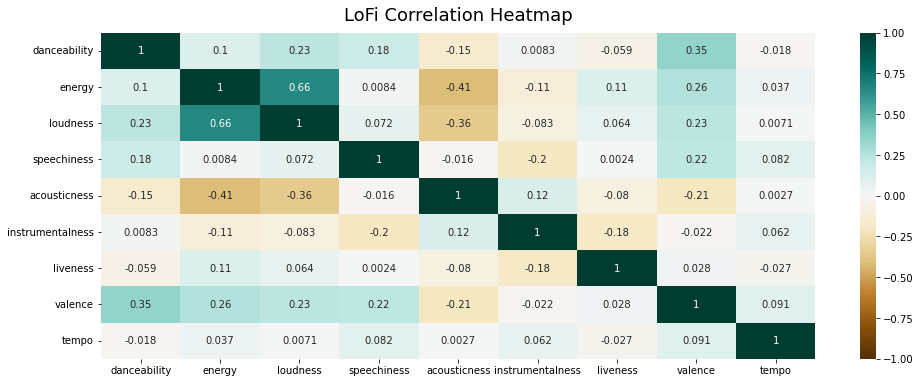

In [15]:
plt.figure(figsize=(16, 6))
df_lofi_eval.drop(columns=['mode','duration_ms','key'], inplace=True)
heatmap = sns.heatmap(df_lofi_eval.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('LoFi Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

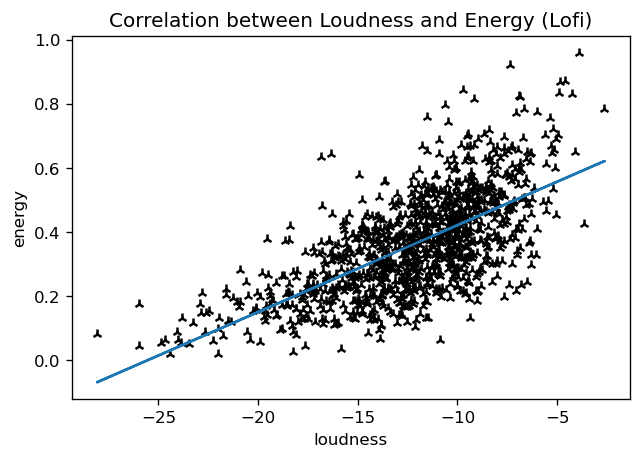

In [152]:
fit = np.polyfit(x=df_lofi_eval['loudness'], y=df_lofi_eval['energy'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(6,4), dpi= 120)
plt.xlabel('loudness'), plt.ylabel('energy')
plt.title ("Correlation between Loudness and Energy (Lofi)")
plt.scatter(x=df_lofi_eval['loudness'], y=df_lofi_eval['energy'], c= 'black', marker='2')
plt.plot(df_lofi_eval['loudness'], line(df_lofi_eval['loudness']))
plt.show()

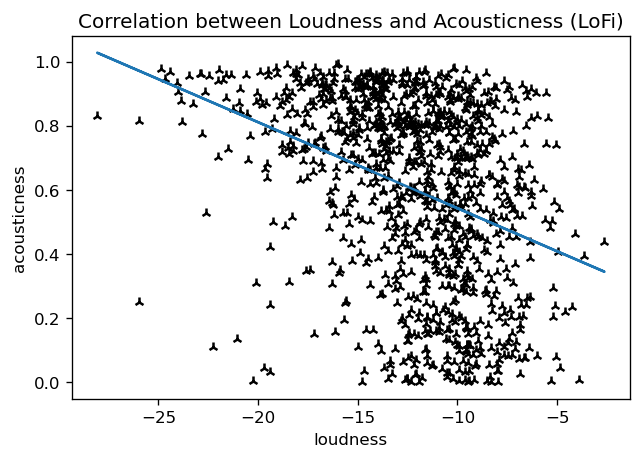

In [151]:
fit = np.polyfit(x=df_lofi_eval['loudness'], y=df_lofi_eval['acousticness'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(6,4), dpi= 120)
plt.xlabel('loudness'), plt.ylabel('acousticness')
plt.title ('Correlation between Loudness and Acousticness (LoFi)')
plt.scatter(x=df_lofi_eval['loudness'], y=df_lofi_eval['acousticness'], c= 'black', marker='2')
plt.plot(df_lofi_eval['loudness'], line(df_lofi_eval['loudness']))
plt.show()

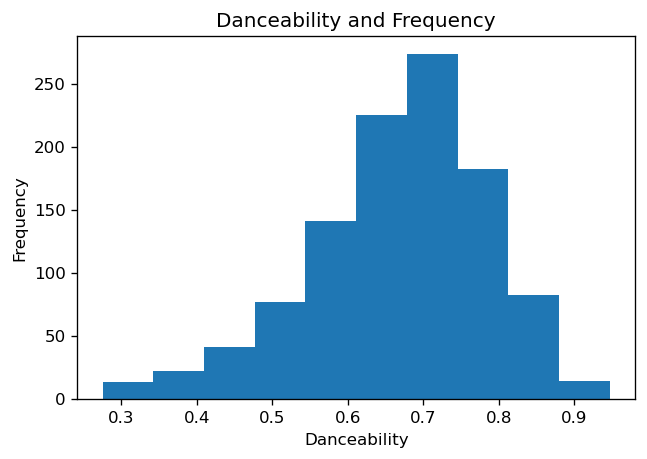

In [150]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['danceability'])
plt.xlabel('Danceability'), plt.ylabel('Frequency')
plt.title('Danceability and Frequency')
plt.show()

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

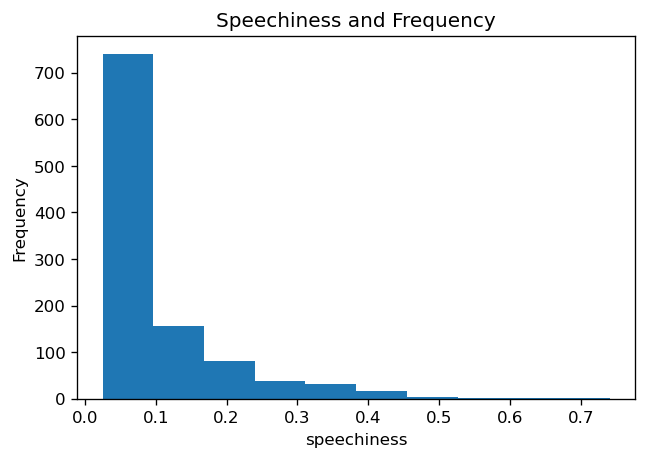

In [149]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['speechiness'])
plt.xlabel('speechiness'), plt.ylabel('Frequency')
plt.title('Speechiness and Frequency')
plt.show()

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.



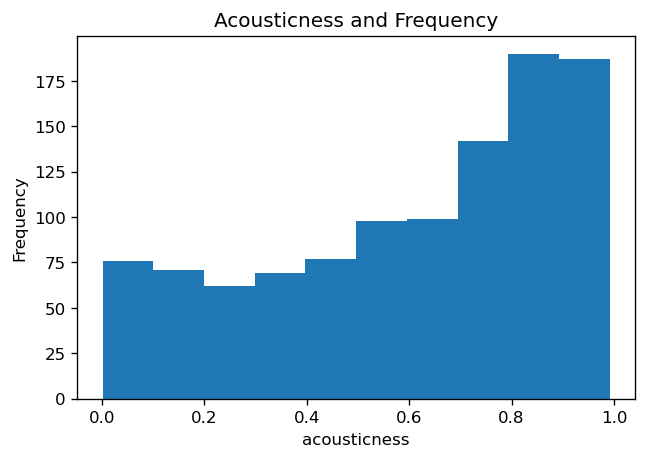

In [148]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['acousticness'])
plt.xlabel('acousticness'), plt.ylabel('Frequency')
plt.title('Acousticness and Frequency')
plt.show()

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.



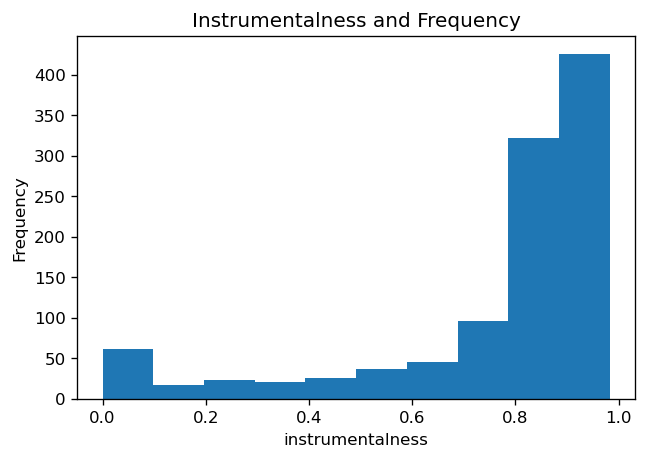

In [147]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['instrumentalness'])
plt.xlabel('instrumentalness'), plt.ylabel('Frequency')
plt.title('Instrumentalness and Frequency')
plt.show()

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.



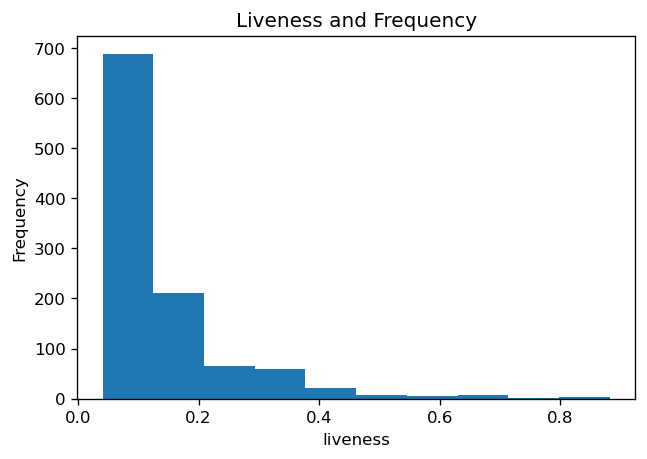

In [146]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['liveness'])
plt.xlabel('liveness'), plt.ylabel('Frequency')
plt.title('Liveness and Frequency')
plt.show()

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.



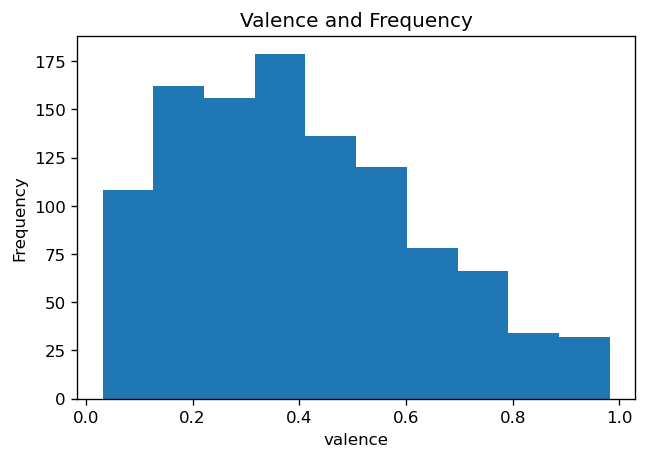

In [145]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['valence'])
plt.xlabel('valence'), plt.ylabel('Frequency')
plt.title('Valence and Frequency')
plt.show()

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).



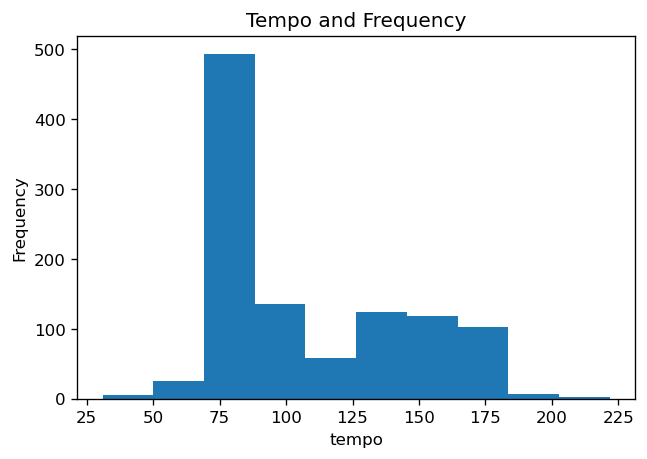

In [144]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_lofi_eval['tempo'])
plt.xlabel('tempo'), plt.ylabel('Frequency')
plt.title('Tempo and Frequency')
plt.show()

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



## Above the mean line

In [264]:
new_df_lofi = df_lofi_eval.reset_index()
new_df_lofi.head()

,index,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.671,0.2750,-11.185,0.0560,0.7960,0.000339,0.0657,0.1590,124.007
1,1,0.655,0.4870,-7.988,0.0330,0.0347,0.897000,0.2710,0.0454,139.914
2,2,0.748,0.2650,-12.074,0.2290,0.9520,0.917000,0.0866,0.1400,77.009
3,3,0.752,0.0625,-24.694,0.0557,0.9450,0.819000,0.1780,0.4620,114.982
4,4,0.895,0.1090,-13.853,0.0996,0.5340,0.549000,0.1060,0.5460,134.067


In [265]:
new_df_lofi.rename(columns={'index':'id'},inplace=True)

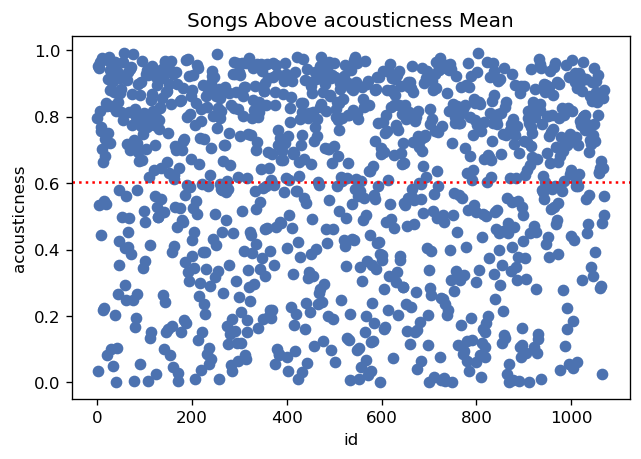

In [266]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_lofi['id'], y=new_df_lofi['acousticness'])
plt.axhline(y=new_df_lofi['acousticness'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('acousticness')
plt.title('Songs Above acousticness Mean')
plt.show()

In [318]:
high_acoustiness = new_df_lofi[new_df_lofi['acousticness'] >= new_df_lofi['acousticness'].mean()]

In [319]:
total_above_mean = high_acoustiness.acousticness.value_counts().sum()
total_above_mean

612

In [320]:
new_df_lofi.shape

(1071, 10)

In [321]:
# Percentage of datapoints above acoustic mean
acoustiness_above_mean = (total_above_mean/1071)*100
acoustiness_above_mean

57.14285714285714

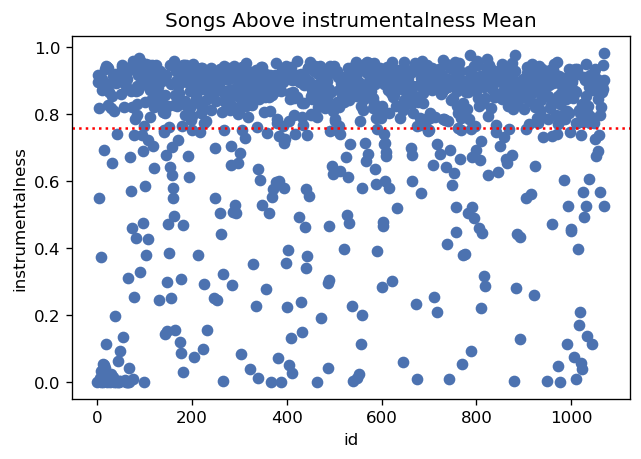

In [267]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_lofi['id'], y=new_df_lofi['instrumentalness'])
plt.axhline(y=new_df_lofi['instrumentalness'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('instrumentalness')
plt.title('Songs Above instrumentalness Mean')
plt.show()

In [322]:
high_instrumentalness = new_df_lofi[new_df_lofi['instrumentalness'] >= new_df_lofi['instrumentalness'].mean()]
total_above_mean = high_instrumentalness.instrumentalness.value_counts().sum()
total_above_mean

787

In [323]:
# Percentage of datapoints above instrumentalness mean
instrumentalness_above_mean = (total_above_mean/1071)*100
instrumentalness_above_mean

73.4827264239029

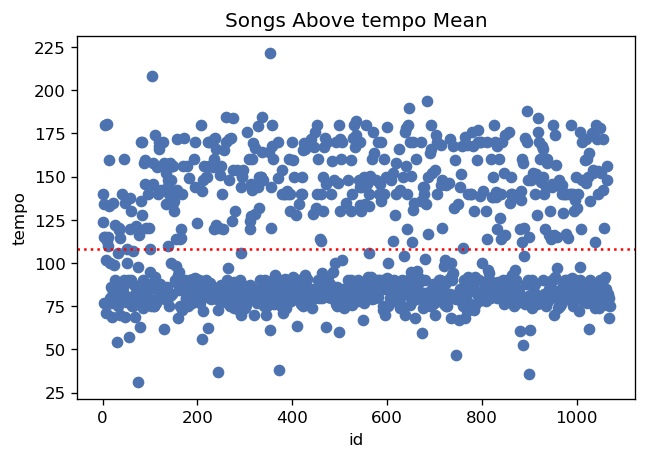

In [324]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_lofi['id'], y=new_df_lofi['tempo'])
plt.axhline(y=new_df_lofi['tempo'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('tempo')
plt.title('Songs Above tempo Mean')
plt.show()

In [325]:
high_tempo = new_df_lofi[new_df_lofi['tempo'] >= new_df_lofi['tempo'].mean()]
total_above_mean = high_tempo.tempo.value_counts().sum()
total_above_mean

411

In [326]:
# Percentage of datapoints above tempo mean
tempo_above_mean = (total_above_mean/1071)*100
tempo_above_mean

38.37535014005603

<Figure size 960x640 with 0 Axes>

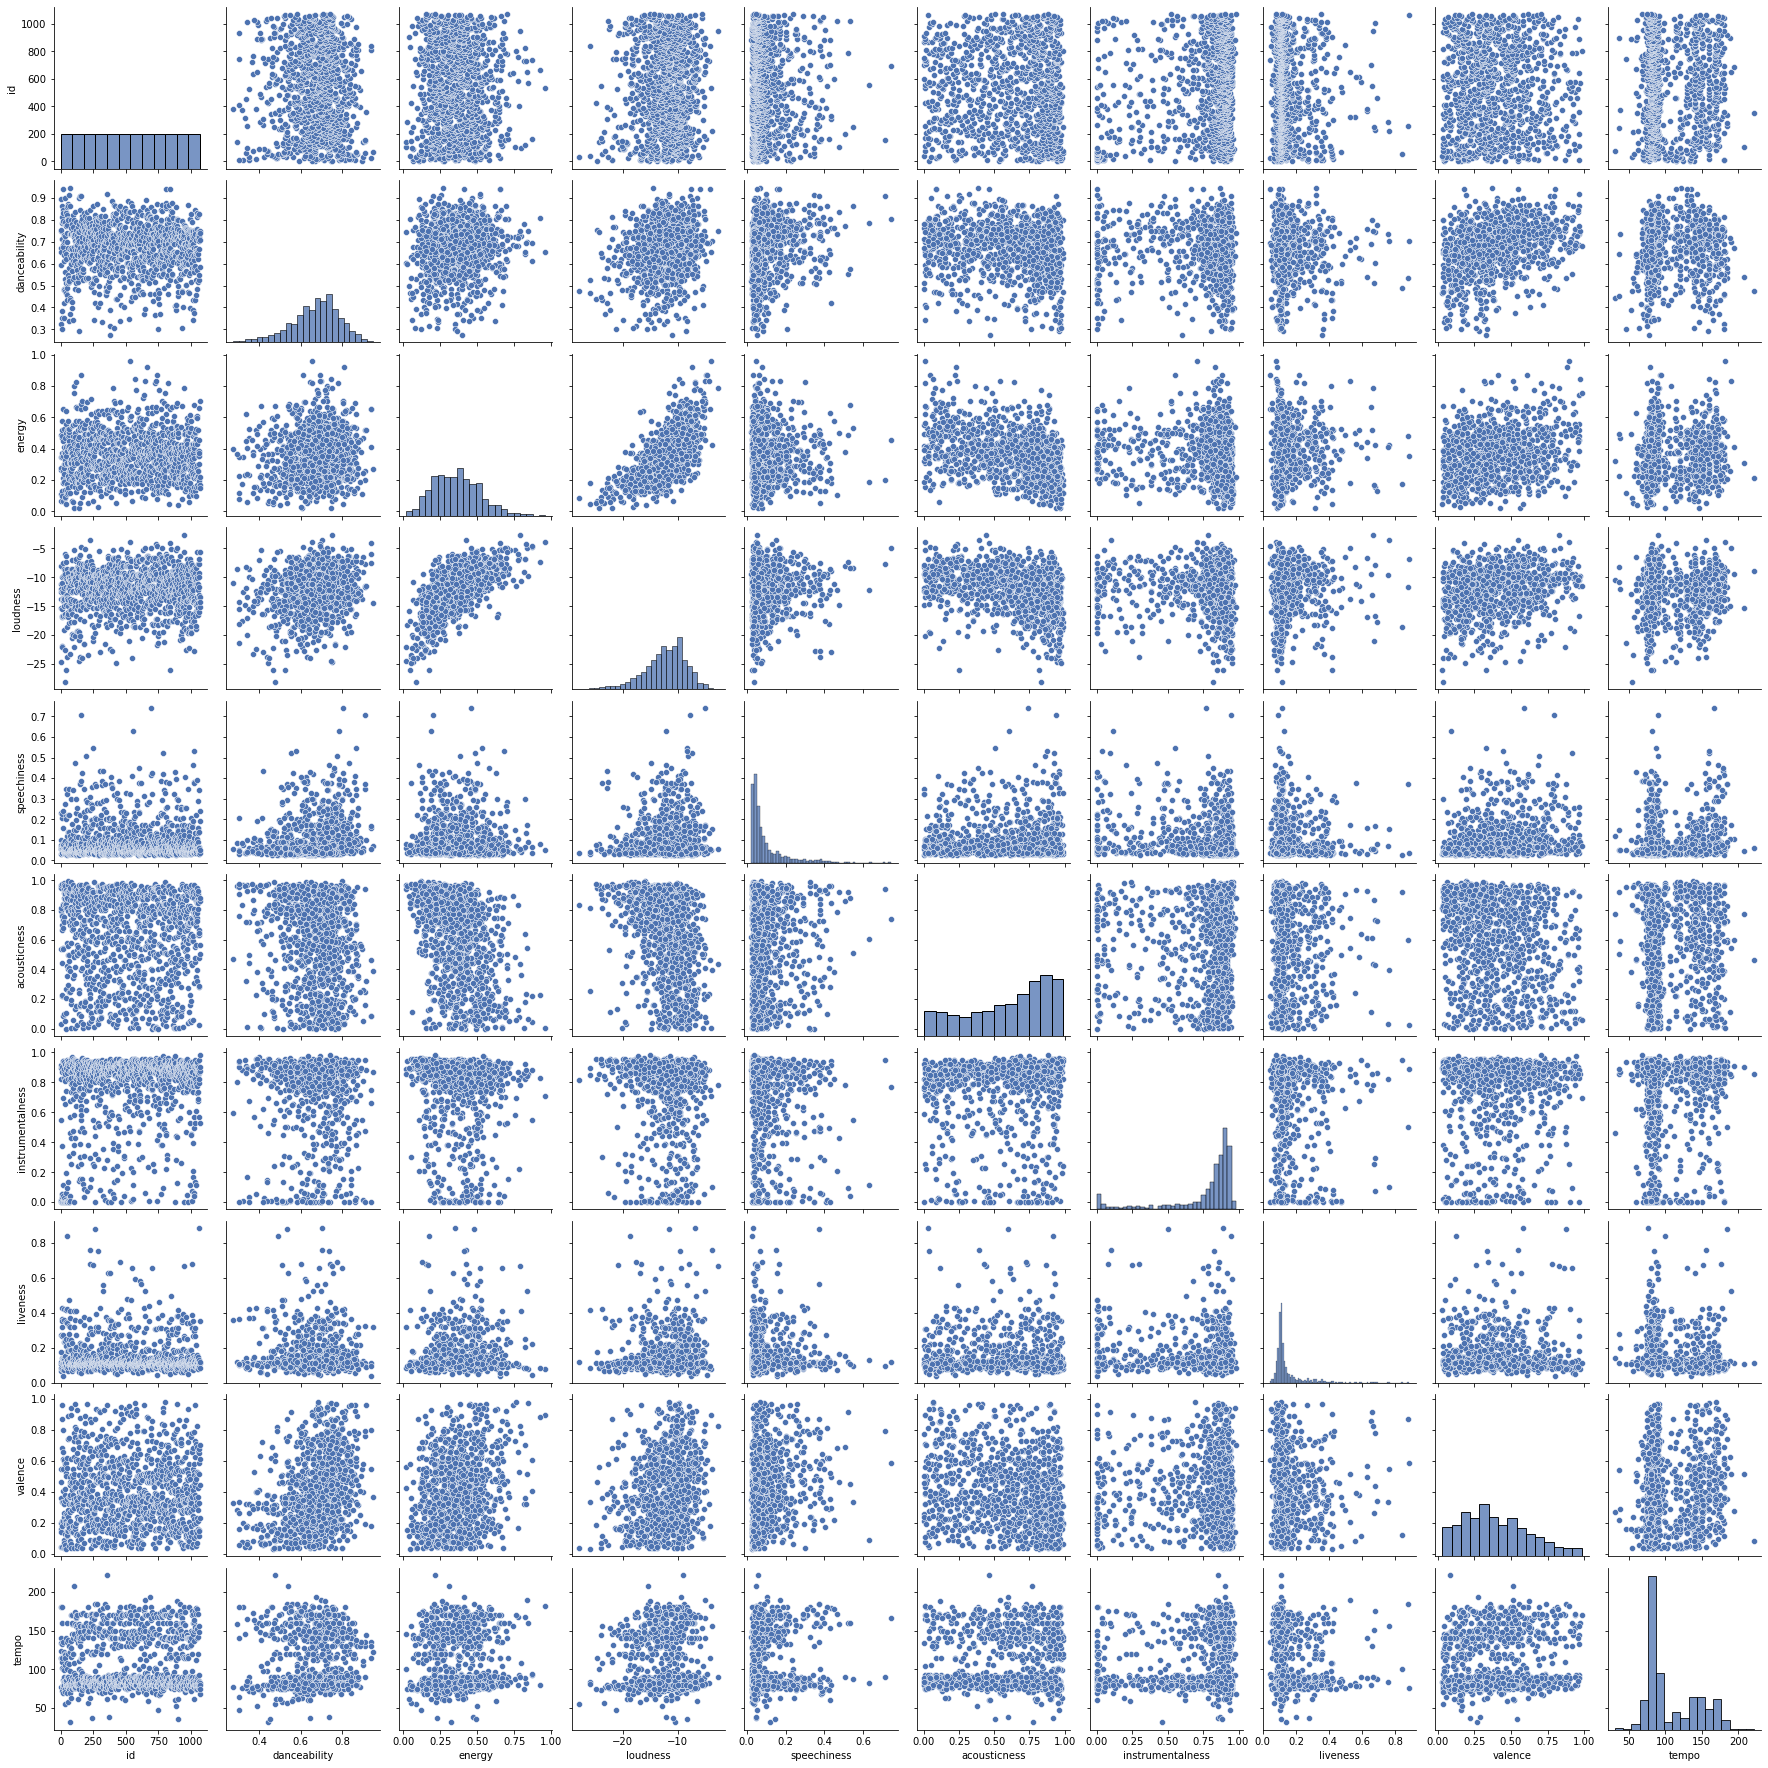

In [278]:
#use pyplot from matplotlib to create a grid of pairplots of every variable.

plt.figure(figsize=(12,8), dpi= 80)
sns.pairplot(new_df_lofi)
plt.show()

# EDM ANALYSIS

In [25]:
#Reading columns into a pandas Dataframe
df_edm = pd.read_sql_query("SELECT * FROM edm_music", con)
df_edm.head()

,track_name,artist_name,album,artist_genres,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Ten Feet Tall,Afrojack,Forget The World (Deluxe),big room,2014-01-01,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,Feel Good (feat. Daya),Gryffin,Feel Good (feat. Daya),dance pop,2017-03-03,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,Narco,Blasterjaxx,Narco,big room,2017-11-13,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,Secrets,Tiësto,"Club Life, Vol. 4 - New York City",big room,2015-05-18,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,Forbidden Voices,Martin Garrix,Forbidden Voices,dance pop,2015-02-23,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [357]:
df_edm.groupby(['artist_genres']).count().index

Index(['Not available', 'alt z', 'art pop', 'aussietronica',
       'australian dance', 'barbadian pop', 'bass house', 'belgian dance',
       'belgian pop', 'big room', 'brazilian edm', 'brostep',
       'canadian electronic', 'chicago house', 'complextro', 'dance pop',
       'danish electronic', 'deep groove house', 'dubstep', 'dutch hip hop',
       'dutch house', 'dutch trance', 'edm', 'electro', 'electro house',
       'french indie pop', 'pop dance', 'tropical house'],
      dtype='object', name='artist_genres')

In [26]:
#Evaluating only the audio features
df_edm_eval = df_edm[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_edm_eval.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.523,0.861,0,-3.447,1,0.0644,0.033600,0.0000,0.1440,0.346,127.049,229149
1,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.0000,0.2130,0.479,138.064,248156
2,0.764,0.943,8,-4.047,1,0.0711,0.007840,0.1040,0.0699,0.207,129.961,208635
3,0.648,0.812,11,-7.585,0,0.0414,0.000329,0.0369,0.0857,0.122,128.178,250947
4,0.534,0.711,10,-5.927,0,0.0368,0.050000,0.0031,0.1350,0.300,128.102,230635


In [27]:
df_edm_eval.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.632705,0.780805,5.657718,-5.185738,0.469799,0.060552,0.094540,0.072246,0.189312,0.398066,125.254530,210069.859060
std,0.110082,0.114487,3.576900,1.714455,0.500770,0.039455,0.136367,0.197850,0.148413,0.199270,12.435448,45310.754059
min,0.209000,0.463000,0.000000,-10.905000,0.000000,0.026200,0.000132,0.000000,0.036000,0.034800,88.519000,132598.000000
25%,0.579000,0.717000,2.000000,-6.102000,0.000000,0.038300,0.012800,0.000000,0.092300,0.227000,121.999000,183726.000000
50%,0.636000,0.792000,6.000000,-5.076000,0.000000,0.047600,0.038100,0.000034,0.135000,0.383000,125.975000,206413.000000
75%,0.705000,0.863000,9.000000,-4.047000,1.000000,0.069300,0.117000,0.005980,0.249000,0.505000,128.029000,229149.000000
max,0.887000,0.989000,11.000000,-0.959000,1.000000,0.256000,0.827000,0.921000,0.938000,0.919000,179.642000,487359.000000


In [28]:
df_edm_eval.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,-0.082635,0.060831,-0.106362,-0.147124,0.106137,0.159992,0.078810,-0.015210,0.392339,-0.423738,-0.305883
energy,-0.082635,1.000000,-0.004454,0.646521,-0.008058,0.117396,-0.390474,0.130996,0.209324,0.027957,0.135922,-0.161733
key,0.060831,-0.004454,1.000000,-0.092196,-0.162356,0.163600,0.018467,0.049256,0.119517,0.050647,-0.022809,-0.078137
loudness,-0.106362,0.646521,-0.092196,1.000000,0.157397,0.010753,-0.220358,-0.122085,-0.022640,0.131752,0.156906,-0.181937
mode,-0.147124,-0.008058,-0.162356,0.157397,1.000000,-0.095658,-0.041062,-0.016989,-0.248243,-0.010316,0.071501,0.088332
speechiness,0.106137,0.117396,0.163600,0.010753,-0.095658,1.000000,0.135589,-0.042020,0.027182,-0.031183,0.119379,-0.003299
acousticness,0.159992,-0.390474,0.018467,-0.220358,-0.041062,0.135589,1.000000,-0.144877,-0.158569,0.026445,-0.189353,0.113598
instrumentalness,0.078810,0.130996,0.049256,-0.122085,-0.016989,-0.042020,-0.144877,1.000000,0.091194,-0.122114,0.062799,0.094824
liveness,-0.015210,0.209324,0.119517,-0.022640,-0.248243,0.027182,-0.158569,0.091194,1.000000,-0.011157,-0.032212,-0.004833
valence,0.392339,0.027957,0.050647,0.131752,-0.010316,-0.031183,0.026445,-0.122114,-0.011157,1.000000,-0.214055,-0.177726


/var/folders/b8/qw7xf4r16w383xrhw3980l4w0000gp/T/ipykernel_28273/1423538556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edm_eval.drop(columns=['mode','duration_ms','key'], inplace=True)


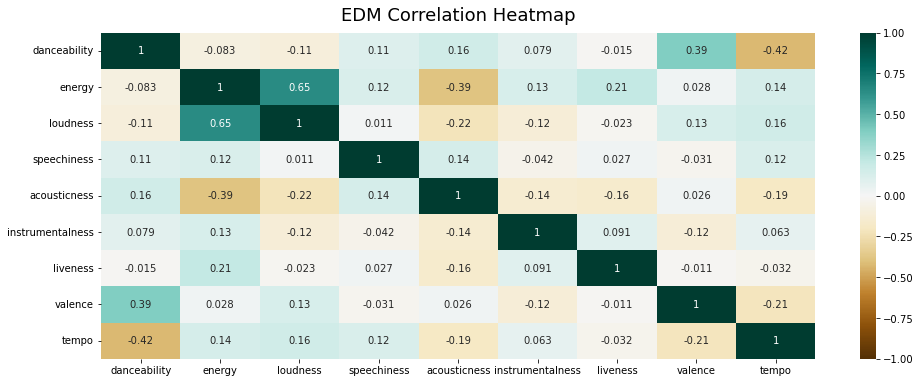

In [29]:
#drop columns not needed
df_edm_eval.drop(columns=['mode','duration_ms','key'], inplace=True)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_edm_eval.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('EDM Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

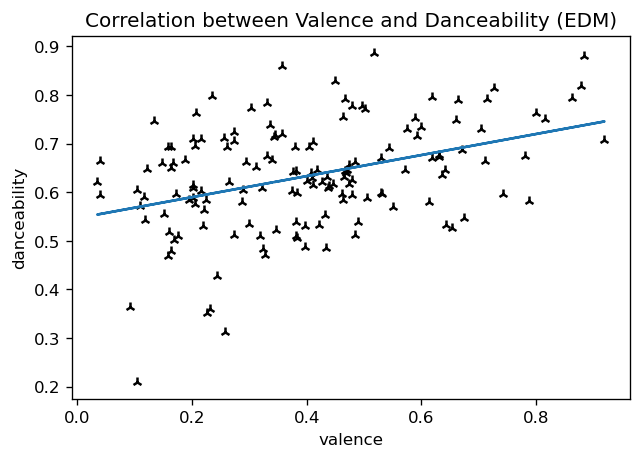

In [143]:
fit = np.polyfit(x=df_edm_eval['valence'], y=df_edm_eval['danceability'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(6,4), dpi= 120)
plt.xlabel('valence'), plt.ylabel('danceability')
plt.title ("Correlation between Valence and Danceability (EDM)")
plt.scatter(x=df_edm_eval['valence'], y=df_edm_eval['danceability'], c= 'black', marker='2')
plt.plot(df_edm_eval['valence'], line(df_edm_eval['valence']))
plt.show()

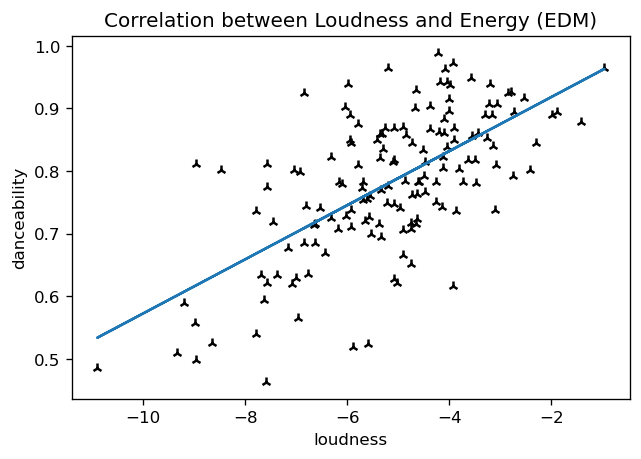

In [142]:
fit = np.polyfit(x=df_edm_eval['loudness'], y=df_edm_eval['energy'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(6,4), dpi= 120)
plt.xlabel('loudness'), plt.ylabel('danceability')
plt.title ("Correlation between Loudness and Energy (EDM)")
plt.scatter(x=df_edm_eval['loudness'], y=df_edm_eval['energy'], c= 'black', marker='2')
plt.plot(df_edm_eval['loudness'], line(df_edm_eval['loudness']))
plt.show()

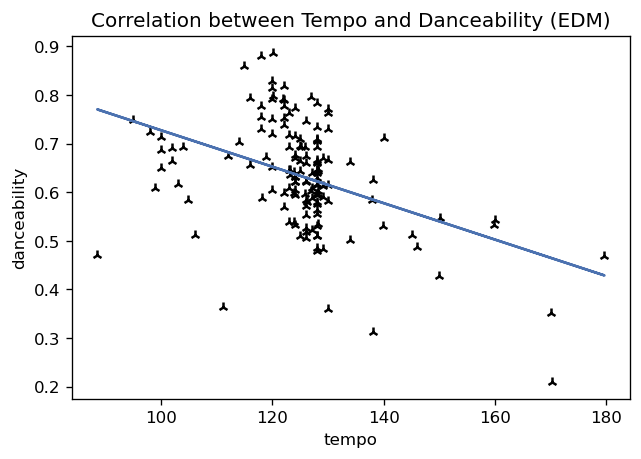

In [271]:
fit = np.polyfit(x=df_edm_eval['tempo'], y=df_edm_eval['danceability'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(6,4), dpi= 120)
plt.xlabel('tempo'), plt.ylabel('danceability')
plt.title ("Correlation between Tempo and Danceability (EDM)")
plt.scatter(x=df_edm_eval['tempo'], y=df_edm_eval['danceability'], c= 'black', marker='2')
plt.plot(df_edm_eval['tempo'], line(df_edm_eval['tempo']))
plt.show()

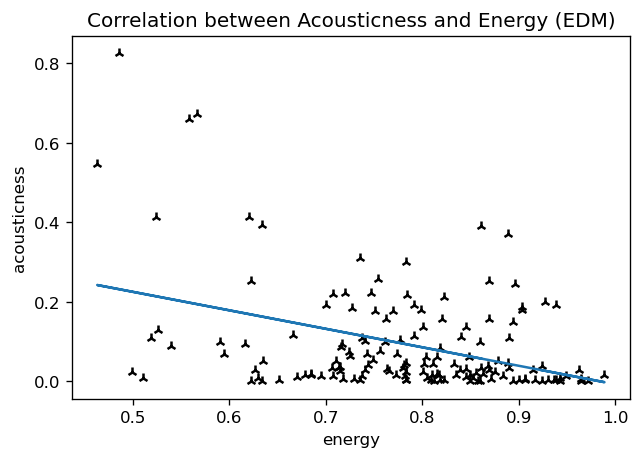

In [140]:
fit = np.polyfit(x=df_edm_eval['energy'], y=df_edm_eval['acousticness'], deg=1)
line = np.poly1d(fit)

plt.figure(figsize=(6,4), dpi= 120)
plt.xlabel('energy'), plt.ylabel('acousticness')
plt.title ("Correlation between Acousticness and Energy (EDM)")
plt.scatter(x=df_edm_eval['energy'], y=df_edm_eval['acousticness'], c= 'black', marker='2')
plt.plot(df_edm_eval['energy'], line(df_edm_eval['energy']))
plt.show()

In [31]:
df_edm_eval.shape

(149, 9)

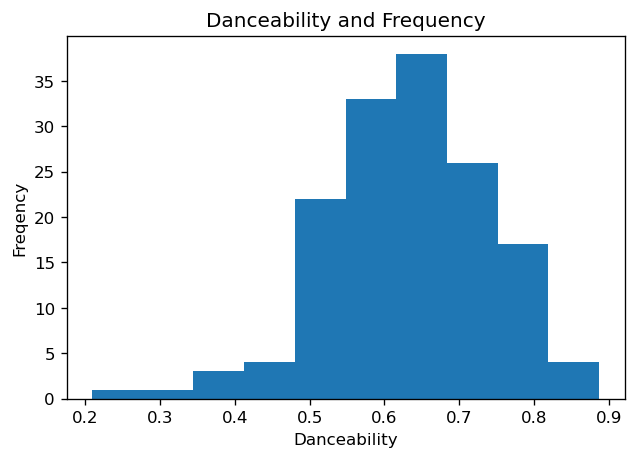

In [138]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['danceability'])
plt.xlabel('Danceability'), plt.ylabel('Freqency')
plt.title('Danceability and Frequency')
plt.show()

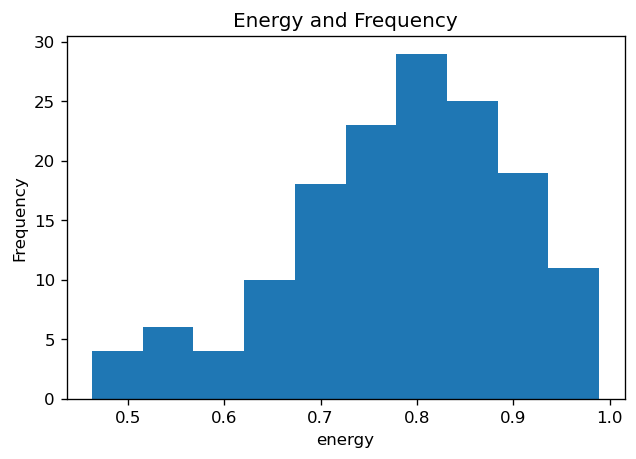

In [137]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['energy'])
plt.xlabel('energy'), plt.ylabel('Frequency')
plt.title('Energy and Frequency')
plt.show()

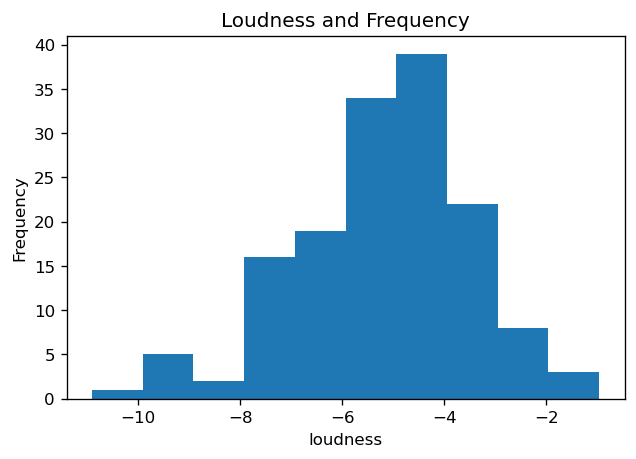

In [136]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['loudness'])
plt.xlabel('loudness'), plt.ylabel('Frequency')
plt.title('Loudness and Frequency')
plt.show()

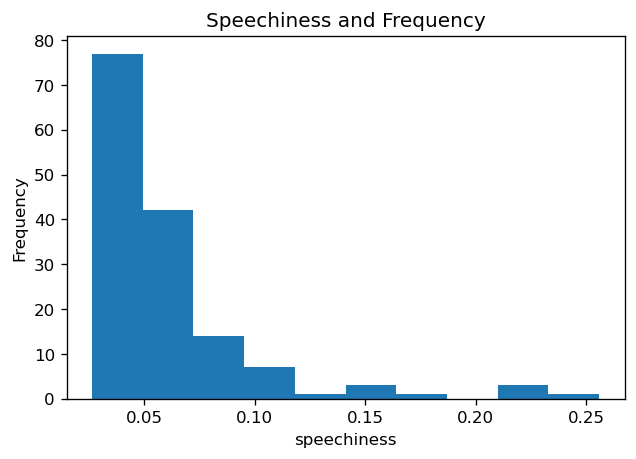

In [135]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['speechiness'])
plt.xlabel('speechiness'), plt.ylabel('Frequency')
plt.title('Speechiness and Frequency')
plt.show()

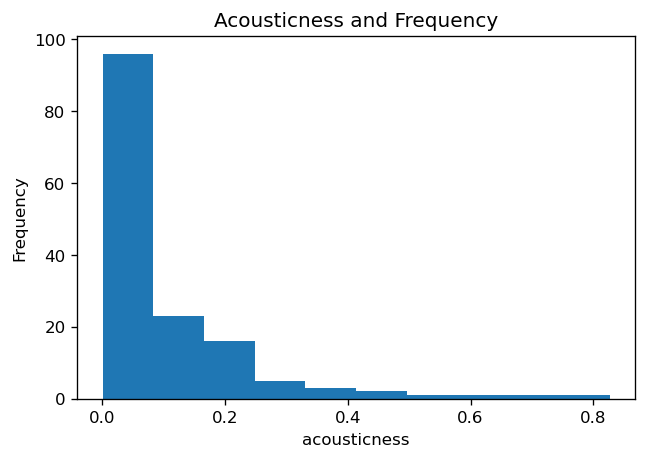

In [134]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['acousticness'])
plt.xlabel('acousticness'), plt.ylabel('Frequency')
plt.title('Acousticness and Frequency')
plt.show()

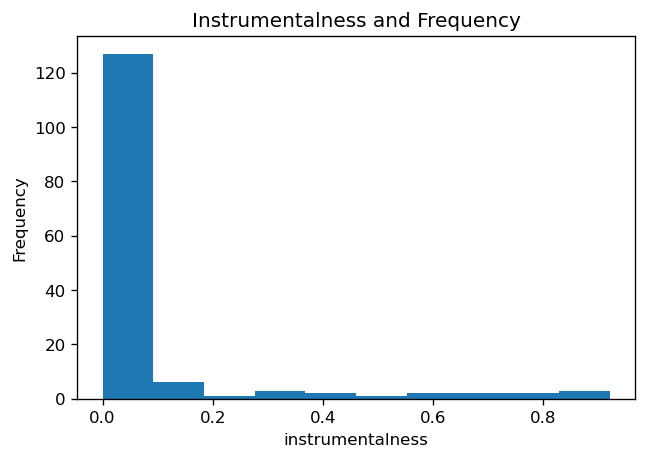

In [133]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['instrumentalness'])
plt.xlabel('instrumentalness'), plt.ylabel('Frequency')
plt.title('Instrumentalness and Frequency')
plt.show()

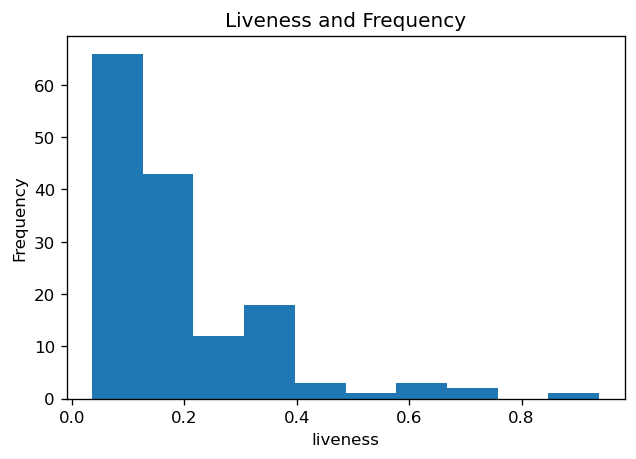

In [130]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['liveness'])
plt.xlabel('liveness'), plt.ylabel('Frequency')
plt.title('Liveness and Frequency')
plt.show()

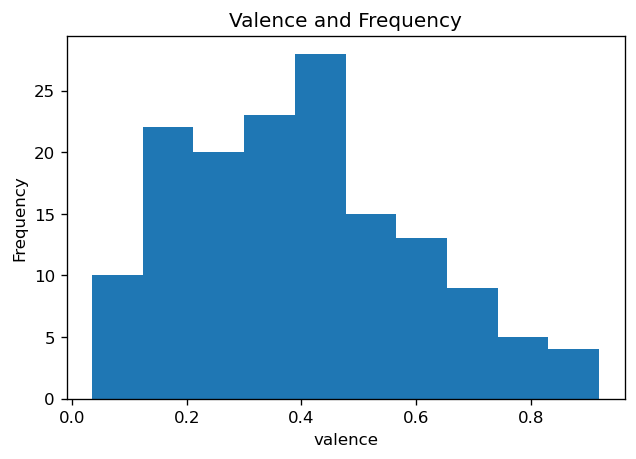

In [126]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['valence'])
plt.xlabel('valence'), plt.ylabel('Frequency')
plt.title('Valence and Frequency')
plt.show()

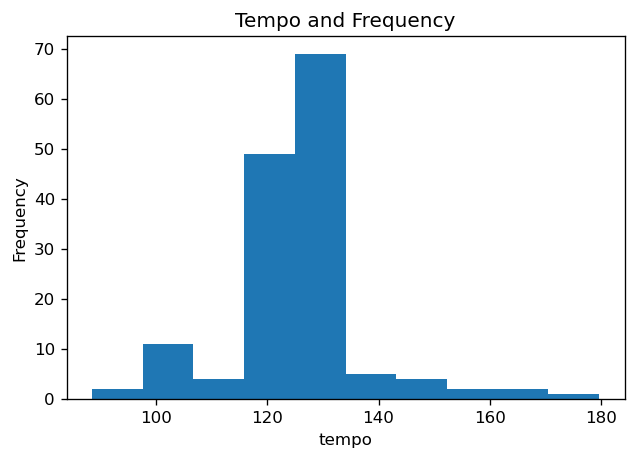

In [127]:
plt.figure(figsize=(6,4), dpi= 120)
plt.hist(x=df_edm_eval['tempo'])
plt.xlabel('tempo'), plt.ylabel('Frequency')
plt.title('Tempo and Frequency')
plt.show()

In [255]:
new_df_EDM = df_edm_eval.reset_index()
new_df_EDM.head()

,index,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.523,0.861,-3.447,0.0644,0.033600,0.0000,0.1440,0.346,127.049
1,1,0.625,0.707,-4.761,0.0337,0.220000,0.0000,0.2130,0.479,138.064
2,2,0.764,0.943,-4.047,0.0711,0.007840,0.1040,0.0699,0.207,129.961
3,3,0.648,0.812,-7.585,0.0414,0.000329,0.0369,0.0857,0.122,128.178
4,4,0.534,0.711,-5.927,0.0368,0.050000,0.0031,0.1350,0.300,128.102


In [256]:
new_df_EDM.rename(columns={'index':'id'},inplace=True)

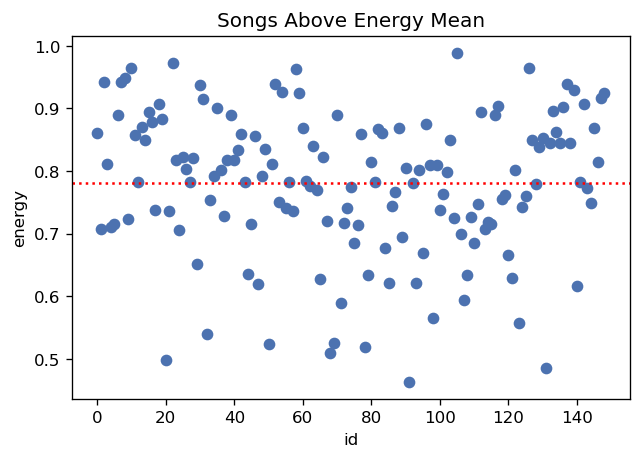

In [257]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_EDM['id'], y=new_df_EDM['energy'])
plt.axhline(y=new_df_EDM['energy'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('energy')
plt.title('Songs Above Energy Mean')
plt.show()

In [315]:
high_energy = new_df_EDM[new_df_EDM['energy'] >= new_df_EDM['energy'].mean()]
total_above_mean = high_energy.energy.value_counts().sum()
total_above_mean

83

In [316]:
new_df_EDM.shape

(149, 10)

In [317]:
# Percentage of datapoints above instrumentalness mean
energy_above_mean = (total_above_mean/149)*100
energy_above_mean

55.70469798657718

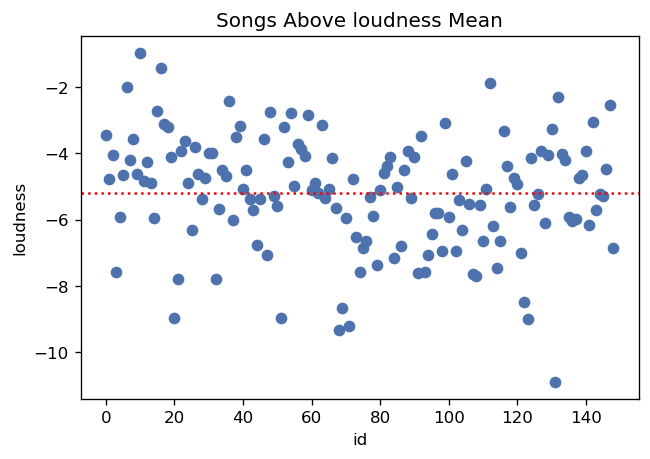

In [258]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_EDM['id'], y=new_df_EDM['loudness'])
plt.axhline(y=new_df_EDM['loudness'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('loudness')
plt.title('Songs Above loudness Mean')
plt.show()

In [312]:
high_loudness = new_df_EDM[new_df_EDM['loudness'] > new_df_EDM['loudness'].mean()]
total_above_mean = high_loudness.loudness.value_counts().sum()
total_above_mean

79

In [313]:
# Percentage of datapoints above instrumentalness mean
loudness_above_mean = (total_above_mean/149)*100
loudness_above_mean

53.02013422818792

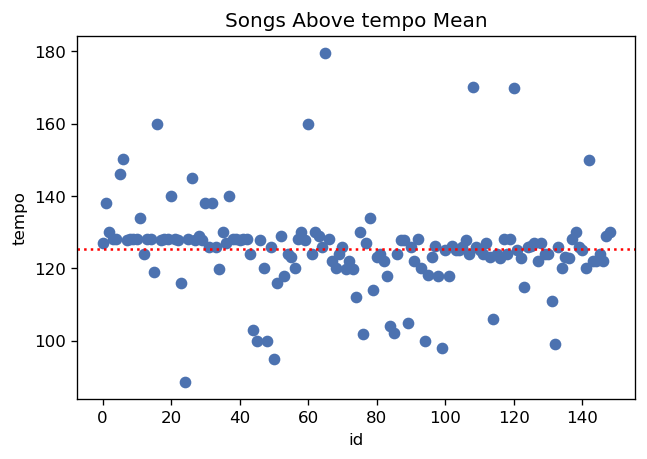

In [259]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_EDM['id'], y=new_df_EDM['tempo'])
plt.axhline(y=new_df_EDM['tempo'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('tempo')
plt.title('Songs Above tempo Mean')
plt.show()

In [327]:
high_tempo = new_df_EDM[new_df_EDM['tempo'] >= new_df_EDM['tempo'].mean()]
total_above_mean = high_tempo.tempo.value_counts().sum()

# Percentage of datapoints above instrumentalness mean
tempo_above_mean = (total_above_mean/149)*100
tempo_above_mean

53.02013422818792

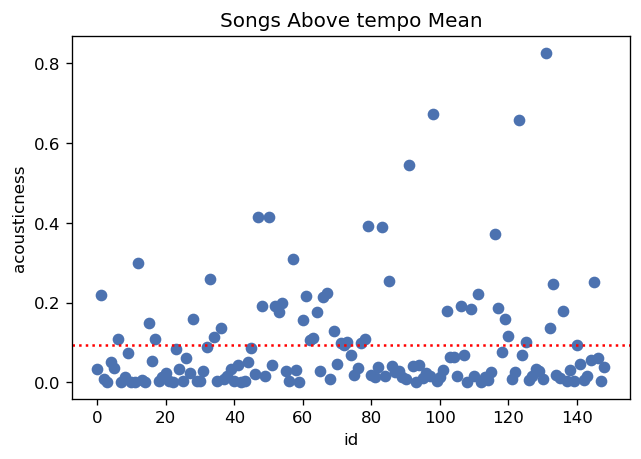

In [260]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_EDM['id'], y=new_df_EDM['acousticness'])
plt.axhline(y=new_df_EDM['acousticness'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('acousticness')
plt.title('Songs Above acousticness Mean')
plt.show()

In [328]:
high_acousticness = new_df_EDM[new_df_EDM['acousticness'] >= new_df_EDM['acousticness'].mean()]
total_above_mean = high_acousticness.acousticness.value_counts().sum()

# Percentage of datapoints above instrumentalness mean
acousticness_above_mean = (total_above_mean/149)*100
acousticness_above_mean

32.21476510067114

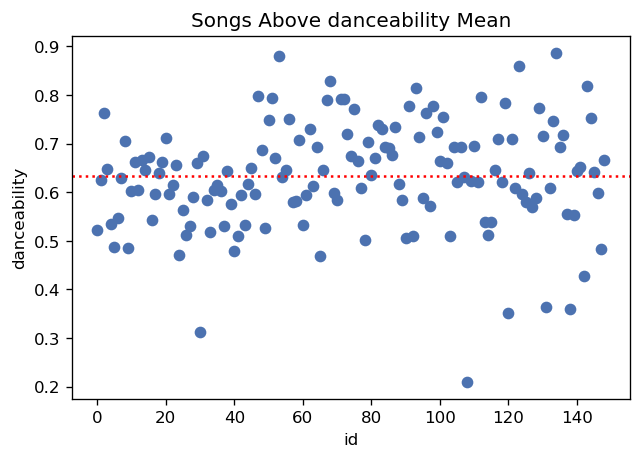

In [261]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_EDM['id'], y=new_df_EDM['danceability'])
plt.axhline(y=new_df_EDM['danceability'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('danceability')
plt.title('Songs Above danceability Mean')
plt.show()

In [329]:
high_danceability = new_df_EDM[new_df_EDM['danceability'] >= new_df_EDM['danceability'].mean()]
total_above_mean = high_danceability.danceability.value_counts().sum()

# Percentage of datapoints above instrumentalness mean
danceability_above_mean = (total_above_mean/149)*100
danceability_above_mean

50.33557046979866

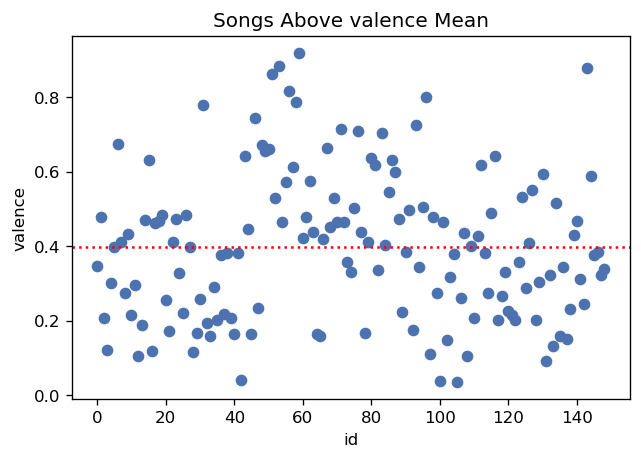

In [263]:
plt.figure(figsize=(6,4), dpi= 120)
plt.scatter(x=new_df_EDM['id'], y=new_df_EDM['valence'])
plt.axhline(y=new_df_EDM['valence'].mean(), color='r', linestyle='dotted')
plt.xlabel('id'), plt.ylabel('valence')
plt.title('Songs Above valence Mean')
plt.show()

In [330]:
high_valence = new_df_EDM[new_df_EDM['valence'] >= new_df_EDM['valence'].mean()]
total_above_mean = high_valence.valence.value_counts().sum()

# Percentage of datapoints above instrumentalness mean
valence_above_mean = (total_above_mean/149)*100
valence_above_mean

48.322147651006716

<Figure size 960x640 with 0 Axes>

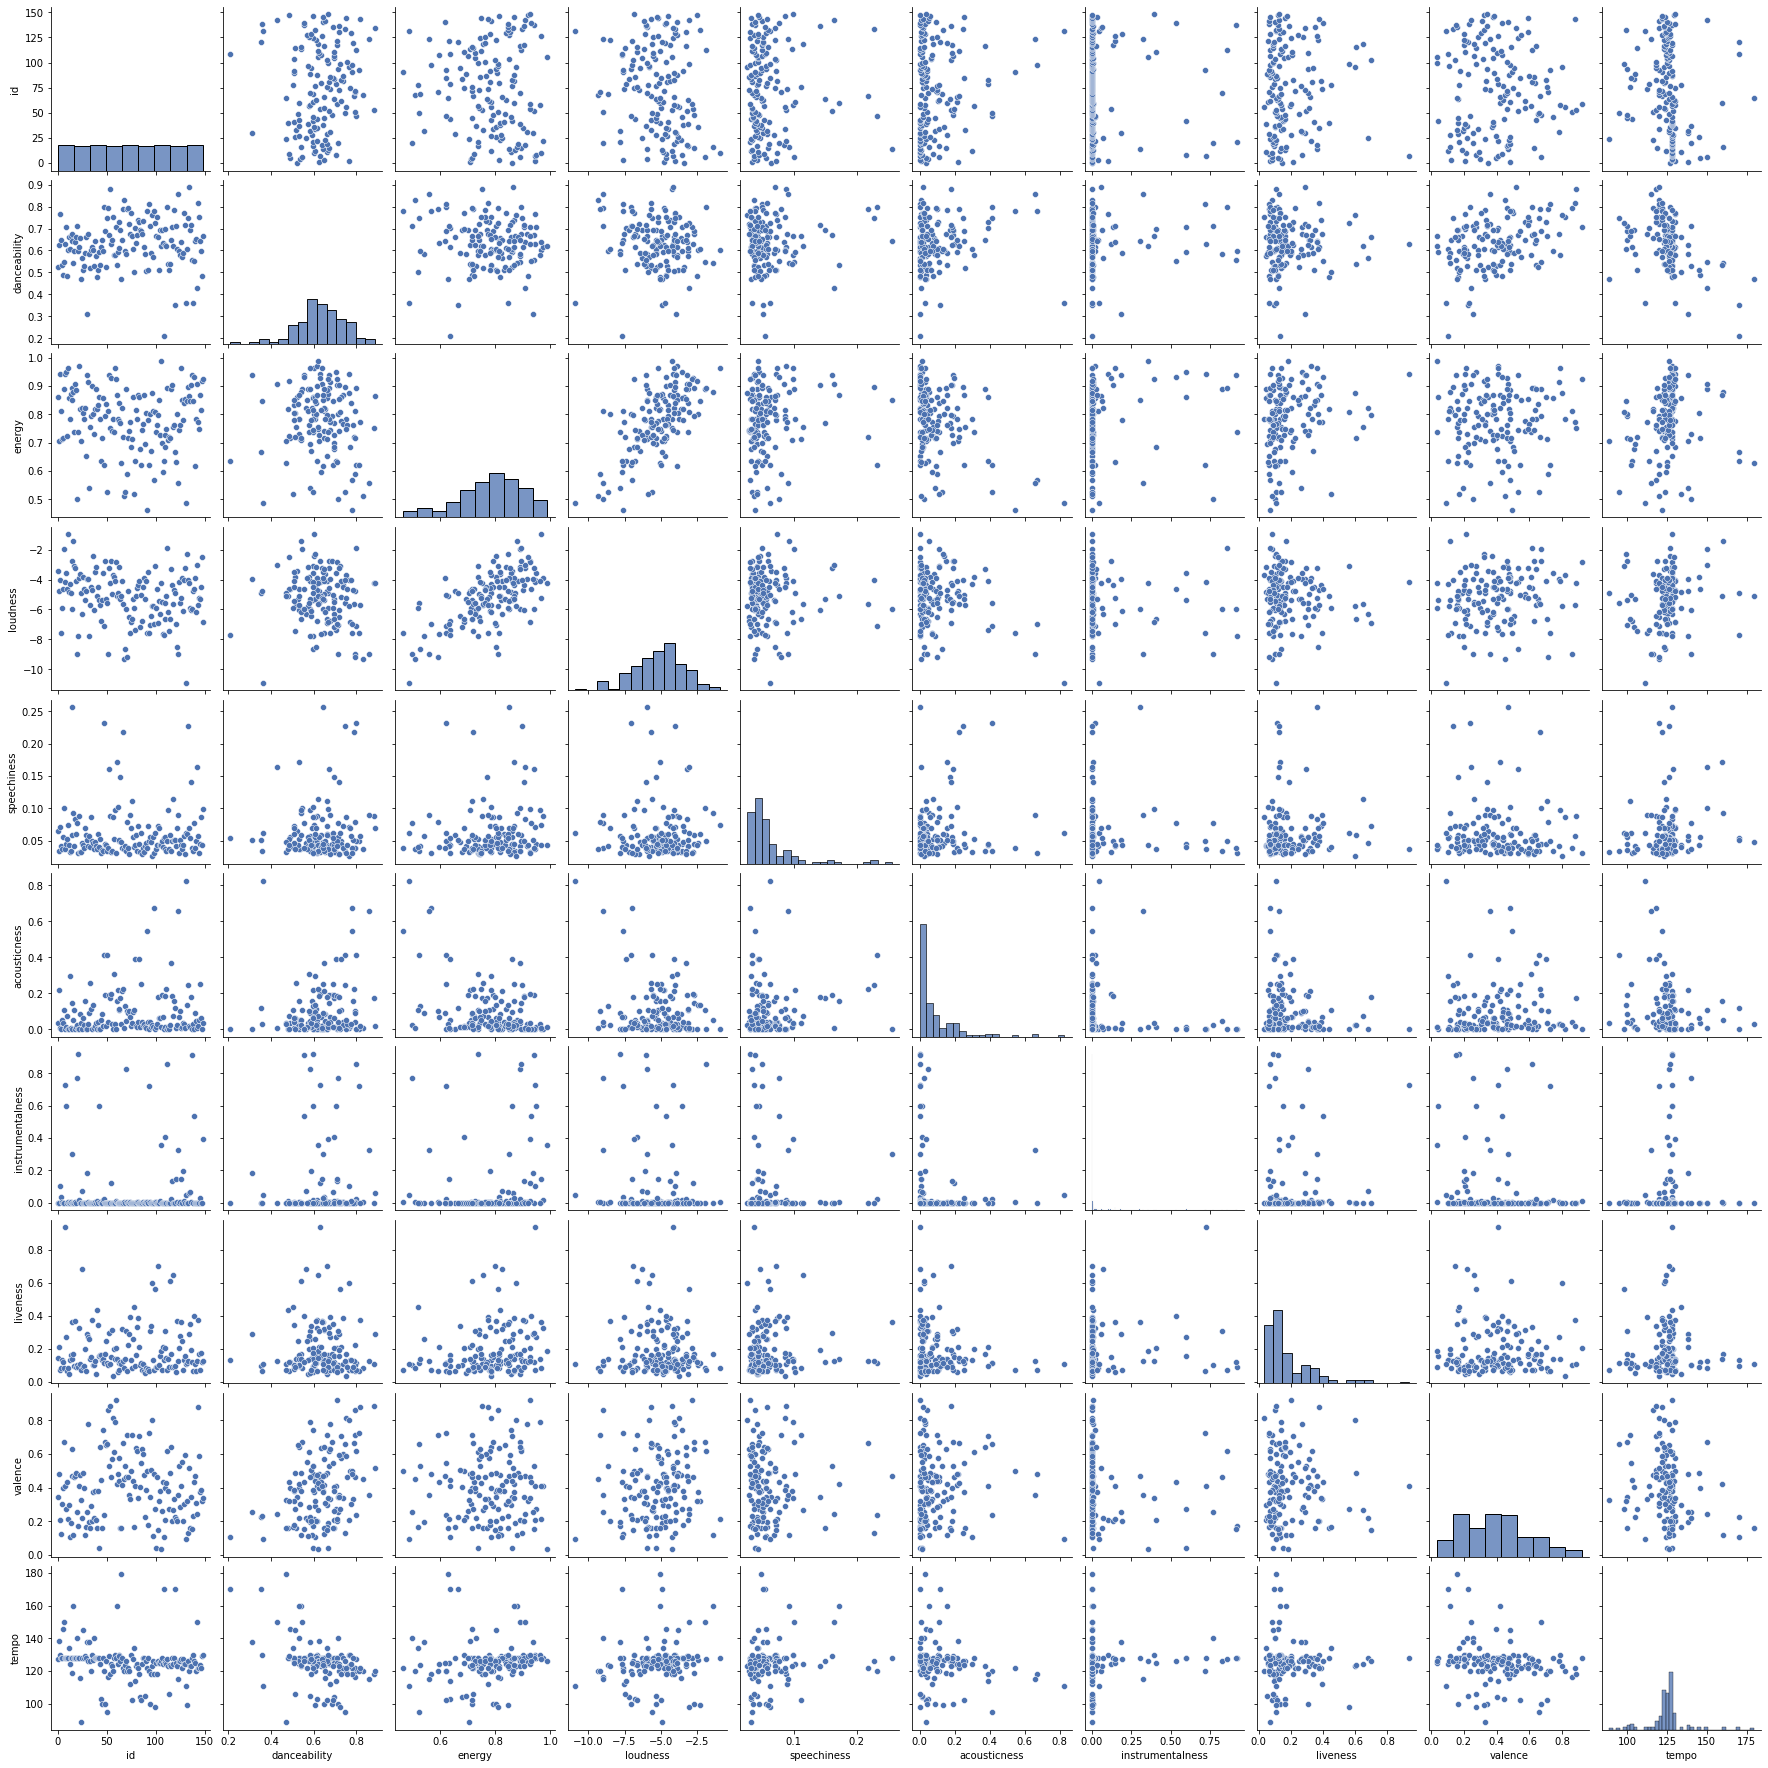

In [279]:
plt.figure(figsize=(12,8), dpi= 80)
sns.pairplot(new_df_EDM)
plt.show()

# COMPARISON

### LoFi

In [84]:
df_lofi_eval.mean().keys()

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [82]:
df_lofi_eval.mean().values

array([ 6.68371615e-01,  3.60879739e-01, -1.22442773e+01,  1.00878805e-01,
        6.03096381e-01,  7.57458667e-01,  1.53165640e-01,  4.01056769e-01,
        1.07969798e+02])

### EDM

In [41]:
df_edm_eval.mean().keys() 

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [42]:
df_edm_eval.mean().values

array([ 6.32704698e-01,  7.80805369e-01, -5.18573826e+00,  6.05516779e-02,
        9.45395101e-02,  7.22461389e-02,  1.89312081e-01,  3.98066443e-01,
        1.25254530e+02])

### Combine

In [171]:
compare_data_test = pd.DataFrame([(df_lofi_eval.mean().values), (df_edm_eval.mean().values)],
                                 columns = df_edm_eval.mean().keys(), index=['LoFi', 'EDM'])
compare_data_test.reset_index()

,index,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,LoFi,0.668372,0.360880,-12.244277,0.100879,0.603096,0.757459,0.153166,0.401057,107.969798
1,EDM,0.632705,0.780805,-5.185738,0.060552,0.094540,0.072246,0.189312,0.398066,125.254530


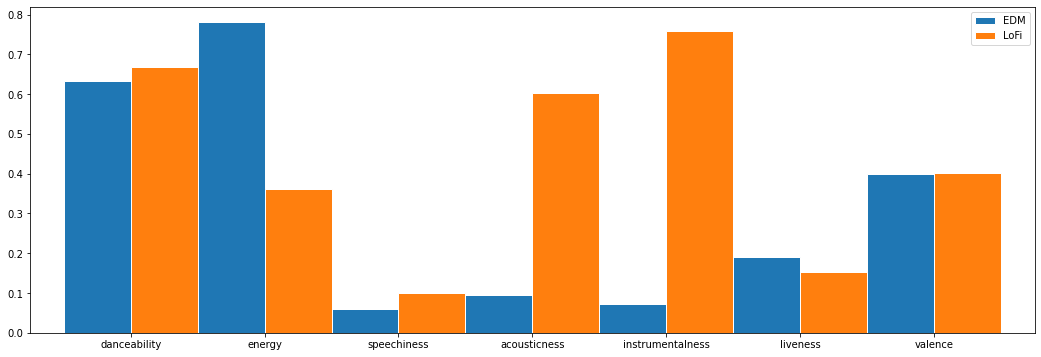

In [172]:
LoFi = [6.68371615e-01,  3.60879739e-01,  1.00878805e-01,
        6.03096381e-01,  7.57458667e-01,  1.53165640e-01,  4.01056769e-01]
EDM = [6.32704698e-01,  7.80805369e-01,  6.05516779e-02,
        9.45395101e-02,  7.22461389e-02,  1.89312081e-01,  3.98066443e-01]
index = ['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence']
compared_df = pd.DataFrame({'EDM': EDM,
                   'LoFi': LoFi}, index=index)
ax = compared_df.plot.bar(rot=0, fontsize=10, figsize=[18, 6], edgecolor='white', align='center', width = 1)

EDM MUSIC: High Energy, High Loudness (scale: -60-0), High Tempo

LoFi: acousticness higher, instrumentalness higher

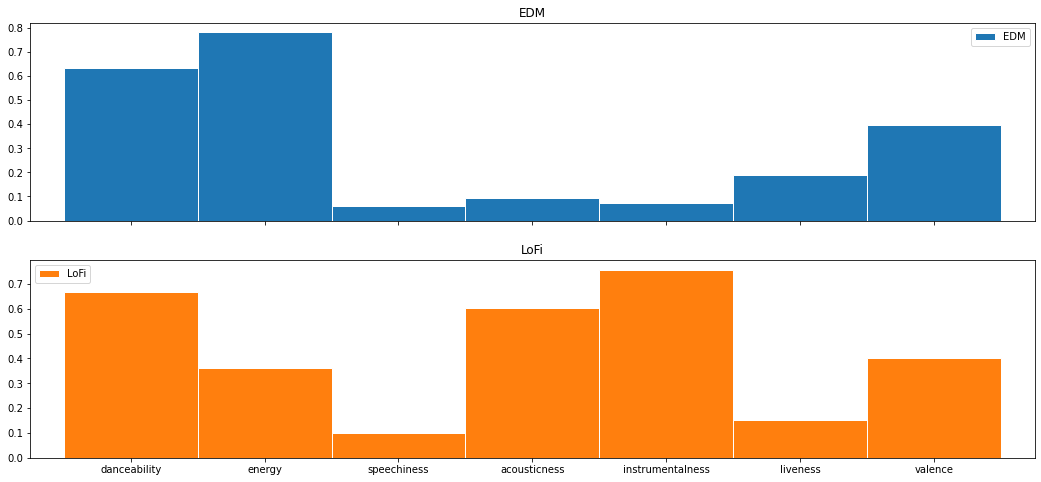

In [173]:
axes = compared_df.plot.bar(rot=0, subplots=True, fontsize=10, figsize=[18, 8], edgecolor='white', align='center', width = 1)
axes[1].legend(loc=2)  

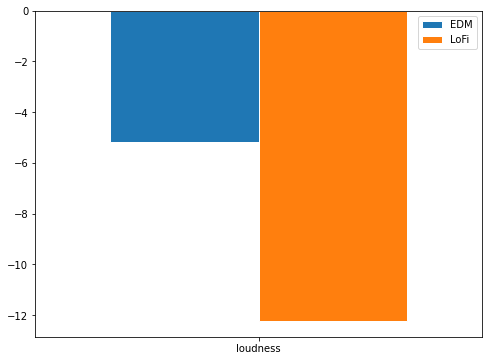

In [174]:
LoFi = [-1.22442773e+01]
EDM = [-5.18573826e+00]
index = ['loudness']
df = pd.DataFrame({'EDM': EDM,
                   'LoFi': LoFi}, index=index)
ax = df.plot.bar(rot=0, fontsize=10, figsize=[8, 6], edgecolor='white', align='center', width = 1)

**Conclusion**: EDM louder than LoFi

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.



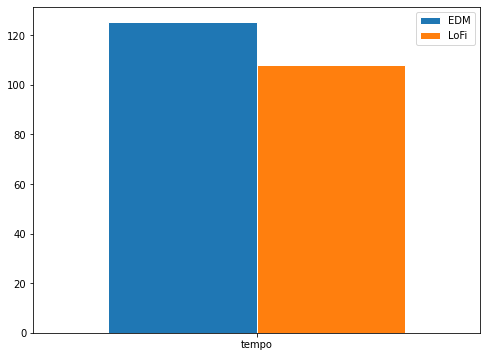

In [175]:
LoFi = [1.07969798e+02]
EDM = [1.25254530e+02]
index = ['tempo']
df = pd.DataFrame({'EDM': EDM,
                   'LoFi': LoFi}, index=index)
ax = df.plot.bar(rot=0, fontsize=10, figsize=[8, 6], edgecolor='white', align='center', width = 1)

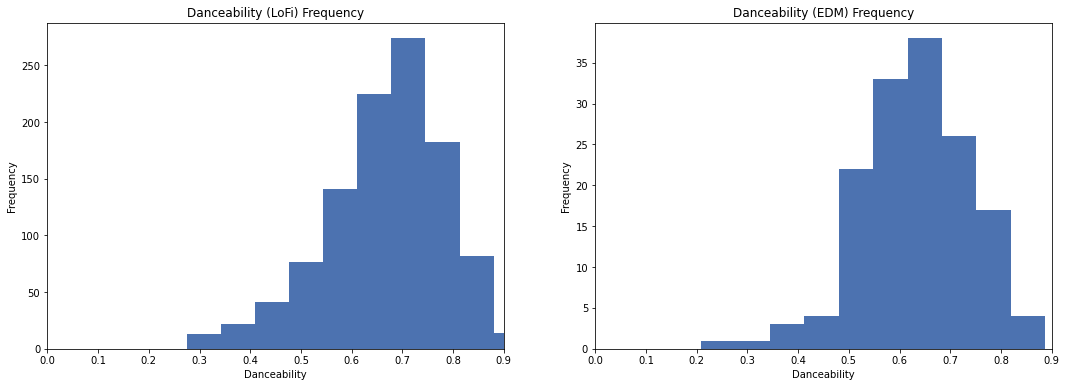

In [242]:
LoFi = df_lofi_eval['danceability']
EDM = df_edm_eval['danceability']

# Chart on L
plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 0.9)
plt.xlabel('Danceability'), plt.ylabel('Frequency')
plt.title('Danceability (LoFi) Frequency')
plt.hist(LoFi)

# Chart on R
plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.title('Danceability (EDM) Frequency')
plt.xlabel('Danceability'), plt.ylabel('Frequency')
plt.xlim(0, 0.9)  
plt.hist(EDM)
plt.show()

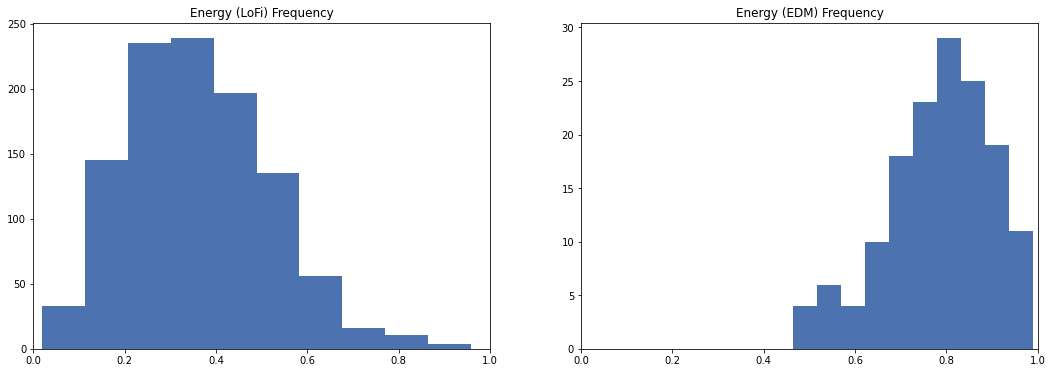

In [224]:
LoFi = df_lofi_eval['energy']
EDM = df_edm_eval['energy']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 1)  
plt.title('Energy (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 1)  
plt.title('Energy (EDM) Frequency')
plt.hist(EDM)
plt.show()

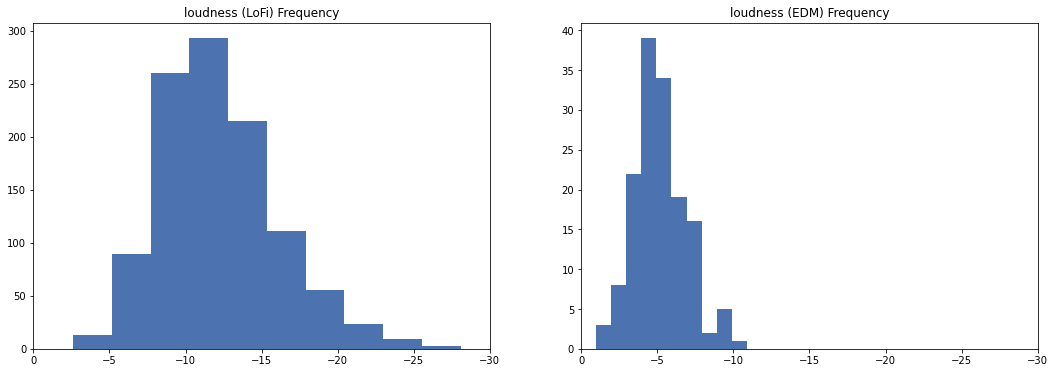

In [227]:
LoFi = df_lofi_eval['loudness']
EDM = df_edm_eval['loudness']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.title('loudness (LoFi) Frequency')
plt.xlim(0, -30)  
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, -30)  
plt.title('loudness (EDM) Frequency')
plt.hist(EDM)
plt.show()

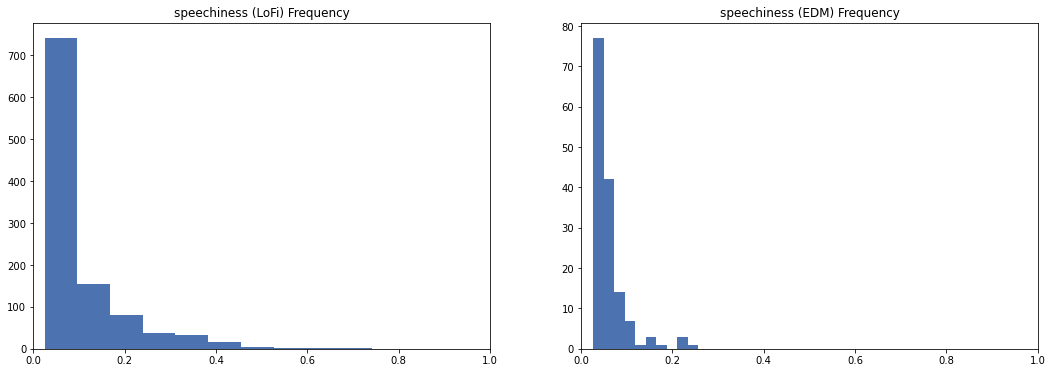

In [230]:
LoFi = df_lofi_eval['speechiness']
EDM = df_edm_eval['speechiness']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 1)  
plt.title('speechiness (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 1)  
plt.title('speechiness (EDM) Frequency')
plt.hist(EDM)
plt.show()

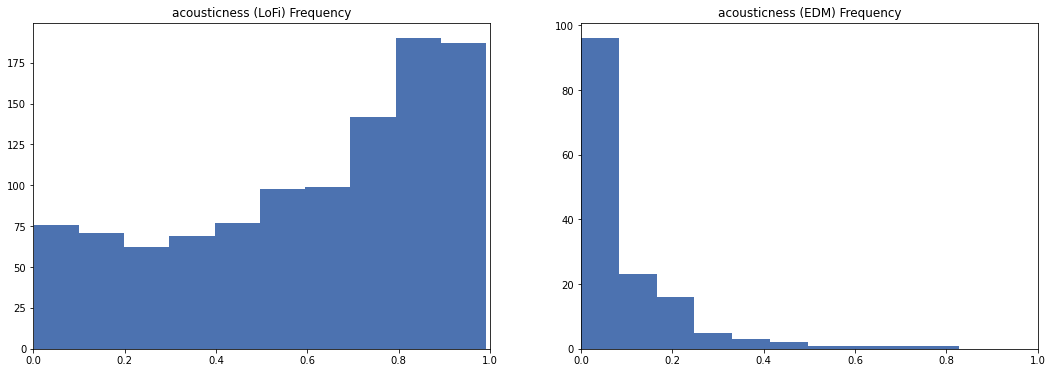

In [231]:
LoFi = df_lofi_eval['acousticness']
EDM = df_edm_eval['acousticness']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 1)  
plt.title('acousticness (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 1)  
plt.title('acousticness (EDM) Frequency')
plt.hist(EDM)
plt.show()

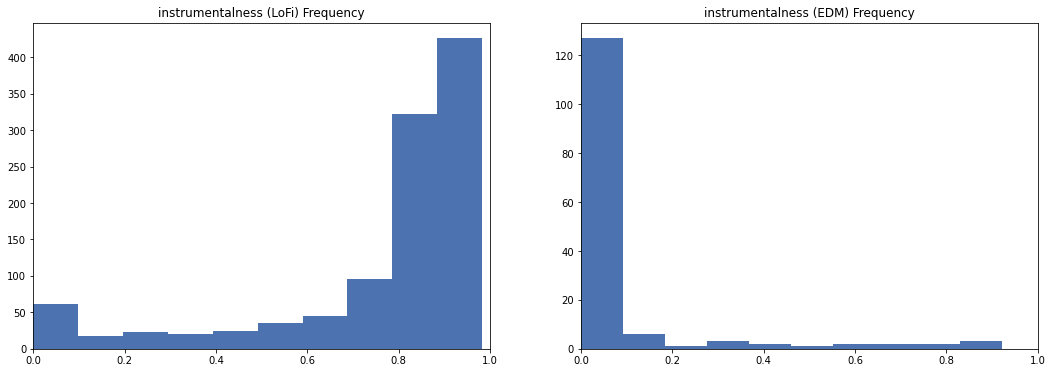

In [232]:
LoFi = df_lofi_eval['instrumentalness']
EDM = df_edm_eval['instrumentalness']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 1)  
plt.title('instrumentalness (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 1)  
plt.title('instrumentalness (EDM) Frequency')
plt.hist(EDM)
plt.show()

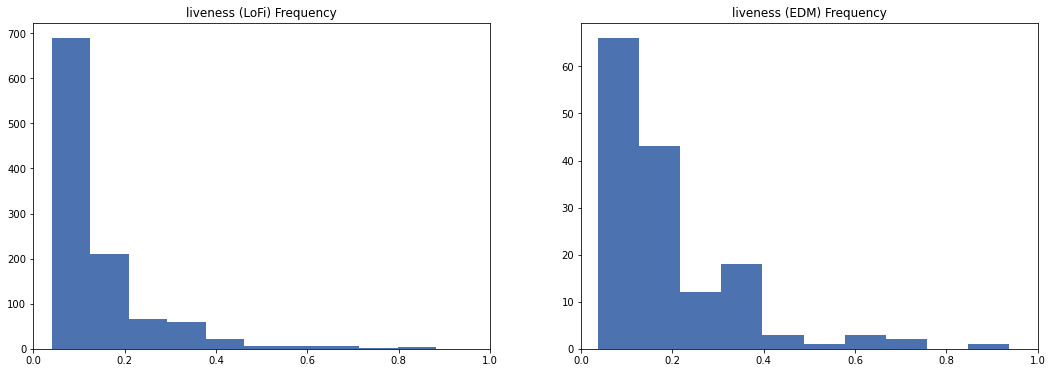

In [233]:
LoFi = df_lofi_eval['liveness']
EDM = df_edm_eval['liveness']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 1)  
plt.title('liveness (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 1)  
plt.title('liveness (EDM) Frequency')
plt.hist(EDM)
plt.show()

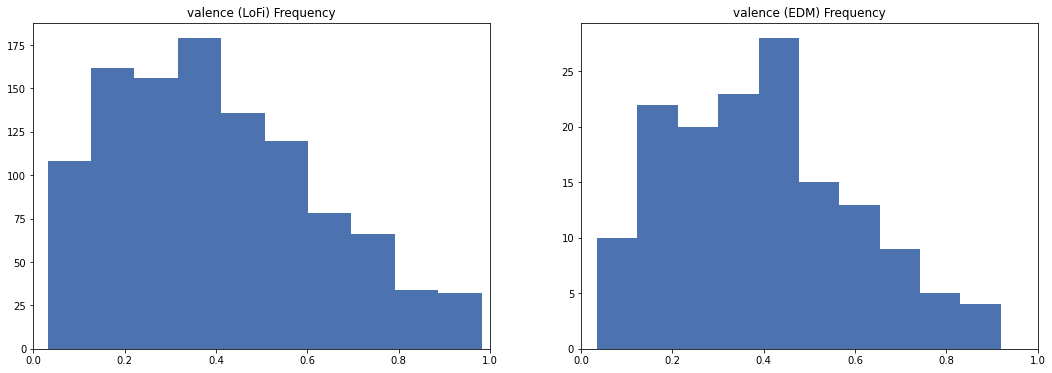

In [244]:
LoFi = df_lofi_eval['valence']
EDM = df_edm_eval['valence']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 1)  
plt.title('valence (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 1)  
plt.title('valence (EDM) Frequency')
plt.hist(EDM)
plt.show()

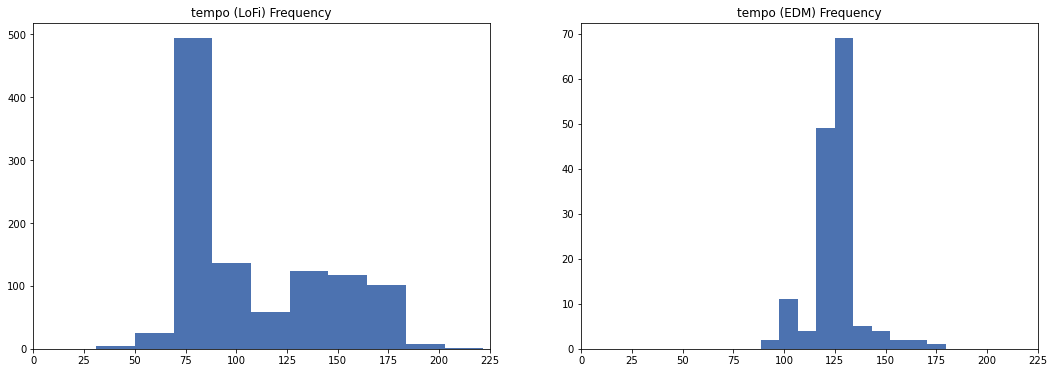

In [238]:
LoFi = df_lofi_eval['tempo']
EDM = df_edm_eval['tempo']

plt.subplots(figsize=(18, 6))
plt.subplot(1, 2, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.xlim(0, 225)  
plt.title('tempo (LoFi) Frequency')
plt.hist(LoFi)

plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.xlim(0, 225)  
plt.title('tempo (EDM) Frequency')
plt.hist(EDM)
plt.show()